In [32]:
# Bag of words Analysis
import os
import pandas as pd
import csv
from collections import defaultdict
import matplotlib.pyplot as plt
import json

In [2]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [3]:
directory = '0325updated.task1train(626p)'

bag_ow = defaultdict(int)
voc = []
doc0 = []
counter = 0
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        with open(os.path.join(directory,filename)) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            for row in csv_reader:
                if(not is_number(row[-1])):
                    # Add our word to our bag_ow
                    bag_ow[row[-1]] += 1
                    # Add it to our vocabulary
                    voc.append(row[-1])
                    if counter == 0:
                        # Just example of creating document
                        doc0.append(row[-1])
            counter += 1
                
                    
sorted_by_occurrence_bag_ow = sorted(bag_ow.items(), key=lambda item: item[1])
print(sorted_by_occurrence_bag_ow[-10:])

[(':', 291), ('QTY', 349), ('AMOUNT', 354), ('CHANGE', 366), ('TOTAL', 367), ('TAX INVOICE', 371), ('CASH', 497), ('GST SUMMARY', 509), ('SR', 675), ('', 983)]


In [4]:
# print(sorted_by_occurrence_bag_ow)
def plot_n_occurrences_word(n, sorted_bag_ow):
    '''Takes in an integer n and a sorted_by_
    occurrence bag of words and returns a plot
    of the n words that appear the most'''
    words_values = sorted_bag_ow[-n:]
    words = []
    values = []
    for i,j in words_values:
        if i in " %'':":
            continue
        words.append(i)
        values.append(j)
    
    plt.bar(words, values)
    plt.xticks(rotation='vertical')
    plt.title(label = "Words with most occurrences in the invoice dataset")
    plt.xlabel("Words")
    plt.ylabel("Total number of occurences")

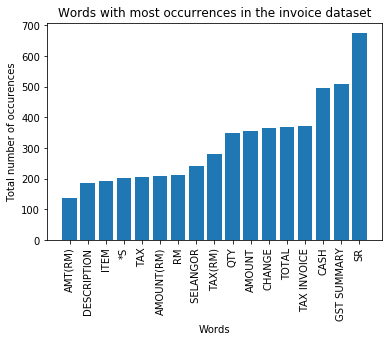

In [5]:
plot_n_occurrences_word(20, sorted_by_occurrence_bag_ow)

### Analyzing words' locations

* First we will try to visualize boxes in an image to get an idea of how coordinates work.
* Then we will get an idea of the distribution of sizes in the images
* We will get the common locations for important words like "total" "amount" "change"

In [6]:
import cv2  
import matplotlib.pyplot as plt
import numpy as np

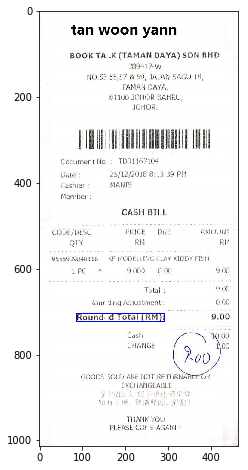

In [7]:
directory = '0325updated.task1train(626p)'
filename = 'X00016469612.jpg'
# Coordinates of ROUND D TOTAL 86,704,292,704,292,723,86,723,ROUND D TOTAL (RM)
def show_image(image_name, start_point, end_point, thickness = 2, color = (255, 0 ,0), notebook=True):
    image = cv2.imread(os.path.join(directory,image_name))
    image = cv2.rectangle(image, start_point, end_point, color, thickness) 
    if notebook:
        img2 = image[:,:,::-1]
        plt.figure(figsize=(8,8))
        plt.imshow(img2)
    else:
        cv2.imshow("image", image)
    
end_point = (86, 704) 
start_point = (292,723) 
show_image(filename, start_point, end_point)

In [8]:
# Now let us create a function that takes all the coordinates and returns the start_point/end_point 
def get_start_end(row):
    '''
    takes all the coordinates and returns the start_point/end_point 
    which correspond to top left point and bottom right point
    '''
    start_point = (int(row[0]), int(row[1]))
    end_point = (int(row[4]), int(row[5]))
    return start_point, end_point

get_start_end(['308', '709', '367', '709', '367', '743', '308', '743'])

((308, 709), (367, 743))

In [9]:
# Let us study size of images

heights = []
widths = []
channels = []
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        img = cv2.imread(os.path.join(directory,filename))
        height, width, channel = img.shape
        heights.append(height)
        widths.append(width)
        channels.append(channel)

In [10]:
# Quick overview
heights_arr = np.array(heights)
widths_arr = np.array(widths)
channels_arr = np.array(channels)
print(len(heights), len(widths), len(channels))

712 712 712


Text(0.5, 0, 'Height size')

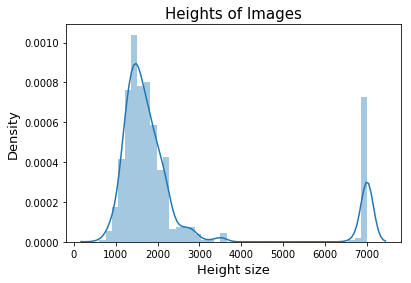

In [11]:
import seaborn as sns

ax = sns.distplot(heights_arr)
ax.set_title('Heights of Images', fontsize=15)
ax.set_ylabel('Density', fontsize=13)
ax.set_xlabel('Height size', fontsize=13)

Text(0.5, 0, 'Witdh size')

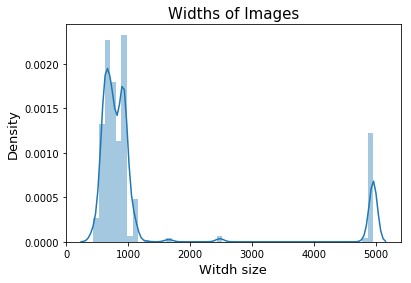

In [12]:
wx = sns.distplot(widths_arr)
wx.set_title('Widths of Images', fontsize=15)
wx.set_ylabel('Density',fontsize=13)
wx.set_xlabel('Witdh size',fontsize=13)

In [13]:
def compute_mean(coordinates):
    '''
    Takes a list of lists of coordinates and computes the mean x/y for 
    start point and end point
    '''
    mean_x_tl, mean_y_tl, mean_x_br, mean_y_br = 0,0,0,0
    for row in coordinates:
        mean_x_tl += int(row[0])
        mean_y_tl += int(row[1])
        mean_x_br += int(row[4])
        mean_y_br += int(row[5])
    
    start_point = (mean_x_tl//len(coordinates), mean_y_tl//len(coordinates))
    end_point = (mean_x_br//len(coordinates), mean_y_br//len(coordinates))
                   
    return start_point, end_point

In [14]:
key_words = ["TOTAL", "AMOUNT", "CASH", "QTY"]

# Let us calculate common quantities like mean x, mean y
coordinates = []
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        with open(os.path.join(directory,filename)) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            for row in csv_reader:
                if row[-1] in key_words:
                    # print(row[:-1], row[-1])
                    coordinates.append(row[:-1])
            


(569, 1185) (659, 1221)


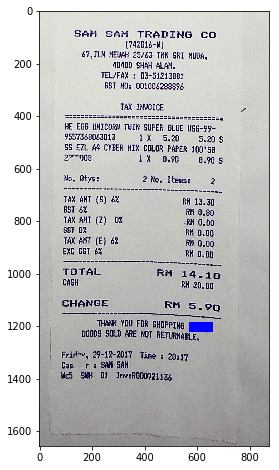

In [15]:
# The average location of the selected words.
s_p, e_p = compute_mean(coordinates)
filename = 'X51005255805.jpg'
print(s_p, e_p)
show_image(filename, s_p, e_p, -1, (255,0,0))


In [30]:
directory_1 = '0325updated.task1train(626p)'
counter_1 = 0
files = []
for filename_1 in os.listdir(directory_1):
    if filename_1.endswith(".jpg"):
        continue
    for filename_2 in os.listdir(directory_2):
        if filename_2 == filename_1:
            # Now we want to add labels to each row in filename_1
            with open(os.path.join(directory_2, filename_2) as json_file):
                data = json.load(json_file)
            with open(os.path.join(directory_1,filename_1)) as csv_file:
                csv_reader = csv.reader(csv_file, delimiter=',')
                for row in csv_reader:
                    if row[-1] == data['total']:
                        # print(row[:-1], row[-1])
                        coordinates.append(row[:-1])
                    elif row[-1] in data['company']:
                        # do something
                    elif row[-1] in data['date']:
                        
                    elif row[-1] in data['address']:
                        


## Legacy code

In [36]:
with open('0325updated.task2train(626p)/X51008164999.txt') as json_file:
    data = json.load(json_file)
print(data)

{'company': 'ONE ONE THREE SEAFOOD RESTAURANT SDN BHD', 'date': '23-06-2018', 'address': 'NO.1, TAMAN SRI DENGKIL, JALAN AIR HITAM 43800 DENGKIL, SELANGOR.', 'total': '179.50'}


In [ ]:
d

In [85]:
# Let us try for one image:
rows = {}
rows['bbox'] = []
rows['text'] = []
rows['label'] = []

with open('0325updated.task2train(626p)/X00016469612.txt') as json_file:
    data = json.load(json_file)
with open('0325updated.task1train(626p)/X00016469612.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        if row[-1] == data['total']:
            rows['label'].append('total')
        else:
            rows['label'].append('other')
        rows['bbox'].append(get_start_end(row[:8]))
        rows['text'].append(row[8:])
print(rows)

<class 'dict'>
{'bbox': [((72, 25), (326, 64)), ((50, 82), (440, 121)), ((205, 121), (285, 139)), ((110, 144), (383, 163)), ((192, 169), (299, 187)), ((162, 193), (334, 211)), ((217, 216), (275, 233)), ((50, 342), (279, 359)), ((50, 372), (96, 390)), ((165, 372), (342, 389)), ((48, 396), (117, 415)), ((164, 397), (215, 413)), ((49, 423), (122, 440)), ((191, 460), (298, 476)), ((30, 508), (121, 523)), ((200, 507), (247, 521)), ((276, 506), (306, 522)), ((374, 507), (441, 521)), ((69, 531), (102, 550)), ((221, 531), (247, 545)), ((420, 529), (443, 547)), ((27, 570), (137, 583)), ((159, 570), (396, 584)), ((77, 598), (113, 613)), ((138, 597), (148, 607)), ((202, 597), (245, 612)), ((275, 598), (309, 612)), ((411, 596), (443, 613)), ((245, 639), (293, 658)), ((118, 671), (291, 687)), ((408, 669), (443, 684)), ((86, 704), (292, 723)), ((401, 703), (443, 719)), ((205, 744), (243, 765)), ((402, 748), (441, 763)), ((205, 770), (271, 788)), ((412, 772), (443, 786)), ((97, 845), (401, 860)), ((1

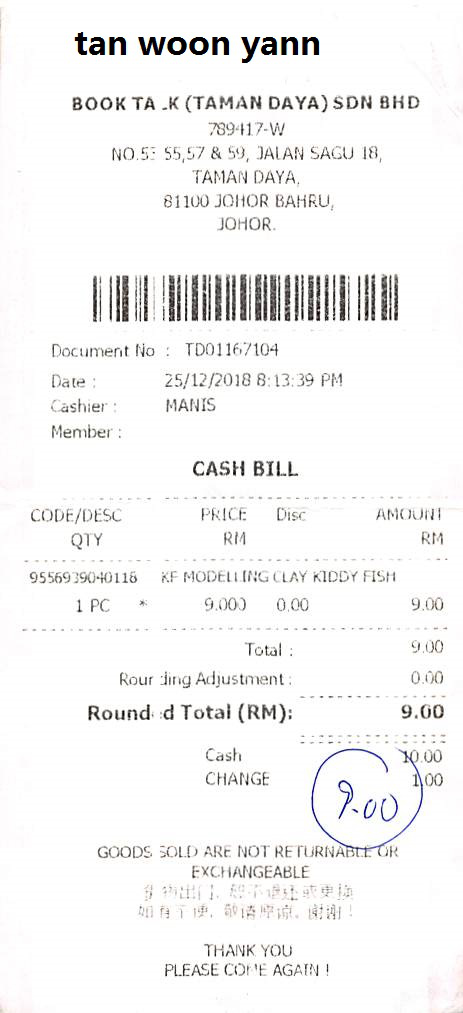

In [76]:
from PIL import Image, ImageDraw, ImageFont

image = Image.open("0325updated.task1train(626p)/X00016469612.jpg")
image = image.convert("RGB")
image

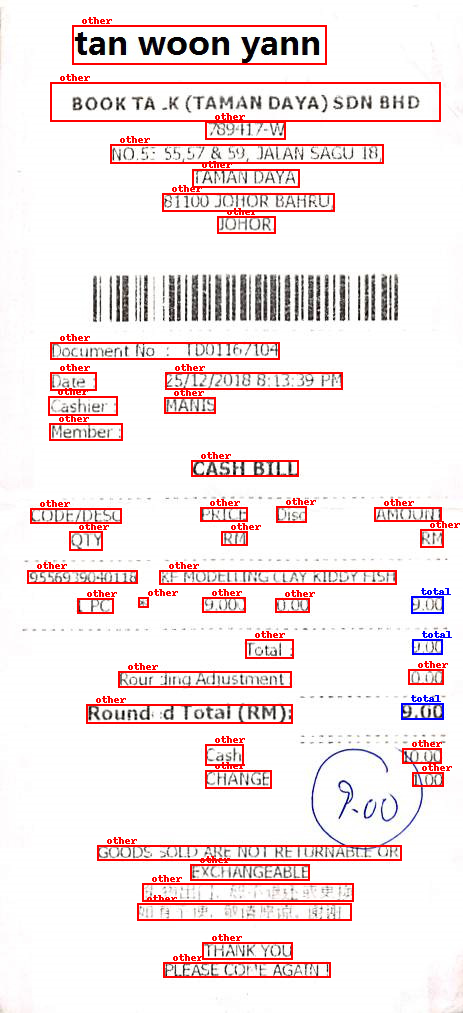

In [77]:
draw = ImageDraw.Draw(image, "RGBA")

font = ImageFont.load_default()

label2color = {'total':'blue','other':'red'}

for general_box, label in zip(rows['bbox'], rows['label']):
    draw.rectangle(general_box, outline=label2color[label], width=2)
    general_box = list(general_box[0])
#     print(general_box)
    draw.text((general_box[0] + 10, general_box[1] - 10), label, fill=label2color[label], font=font)


image

In [39]:
with open('0325updated.task2train(626p)/X51008164999.txt') as json_file:
    data = json.load(json_file)

In [43]:
rows = []
with open('0325updated.task2train(626p)/X00016469612.txt') as json_file:
    data = json.load(json_file)
with open('0325updated.task1train(626p)/X00016469612.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        rows.append(row)
        if row[-1] == data['total']:
            rows[-1].append('total')
        else:
            rows[-1].append('other')

In [79]:
data_set = {"key1": [1, 2, 3], "key2": [4, 5, 6]}

json_dump = json.dumps(data_set)

print(json_dum))

<class 'str'>


## Create folder with images and json objects

In [100]:
import json
# Let us try for one image:

rows = {}
rows['form'] = []


with open('0325updated.task2train(626p)/X00016469612.txt') as json_file:
    data = json.load(json_file)
with open('0325updated.task1train(626p)/X00016469612.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        total = False
        if row[-1] == data['total']:
            total = True
        rows['form'].append({
            'bbox': get_start_end(row[:8]),
            'text': row[8:],
            'label': 'total' if total else 'other'
        })
        
filename = "data.json"
directory = "data/training_data/annotations"
with open(os.path.join(directory,filename), 'w') as outfile:
    json.dump(rows, outfile)

In [105]:
# Now for all the images
from PIL import Image

'''
Go over all files and put annotations in 
data/training_data/annotations and 
images in data/training_data/images
'''

directory_1 = '0325updated.task1train(626p)'
directory_2 = '0325updated.task2train(626p)'
dest_directory = "data/training_data/annotations"
dest_directory_images = "data/training_data/images"

for filename in os.listdir(directory_1):
    if filename.endswith(".txt") and filename[-5] != ")":
        with open(os.path.join(directory_2, filename)) as json_file:
            data = json.load(json_file)
        with open(os.path.join(directory_1, filename)) as csv_file:
            rows = {}
            rows['form'] = []
            csv_reader = csv.reader(csv_file, delimiter=',')
            for row in csv_reader:
                total = False
                if row[-1] == data['total']:
                    total = True
                rows['form'].append({
                    'bbox': get_start_end(row[:8]),
                    'text': row[8:],
                    'label': 'total' if total else 'other'
                })
        filename_ = filename[:-4]
        filename_ += ".json"
        
        with open(os.path.join(dest_directory,filename_), 'w') as outfile:
            json.dump(rows, outfile)
    elif filename.endswith(".jpg") and filename[-5] != ")":
        # There must be a better way to do this
        im1 = Image.open(os.path.join(directory_1,filename))
        im1.save(os.path.join(dest_directory_images, filename))
            
        